In [2]:
import pandas as pd
import glob
from datetime import datetime
import matplotlib.pyplot as plt

out_dir = "../data" #output directory
# read data from all files
result = pd.concat(
    [pd.read_csv(file, encoding="utf-8", parse_dates=[1,2,5], dayfirst=True) for file in glob.glob(out_dir + "/*.csv")],
    ignore_index=True)

In [23]:
#group by time ranges
per = result.date.dt.to_period("M")
df = result.groupby(by=['author', per, 'status']).agg({'factor':['sum', 'count']})
# tune up dataframe
df.columns = ["_".join(x) for x in df.columns.ravel()]
df.reset_index(inplace=True)
# make columns with detailed data on W-R-L
df = df.pivot_table(index=['author', 'date'], columns='status', values=['factor_sum', 'factor_count'])
df.columns = ["_".join(x) for x in df.columns.ravel()]
df = df.fillna(value=0)
# add summary columns
MIN_GAMES_THRES = 5 # too few games per month are not counted
df['count'] = [s if s > MIN_GAMES_THRES else float('nan') for s in df['factor_count_L'] + df['factor_count_R'] + df['factor_count_W'] ]
df['return'] = df['factor_sum_W'] + df['factor_count_R']
df['win'] = df['factor_sum_W'] - df['factor_count_L'] - df['factor_count_W']
df['success_rate'] = df['win'] / df['count'] * 100
df.reset_index(inplace=True)
df

,author,date,factor_count_L,factor_count_R,factor_count_W,factor_sum_L,factor_sum_R,factor_sum_W,count,return,win,success_rate
0,Arturio,2016-02,0.0,0.0,1.0,0.00,0.00,5.00,NaN,5.00,4.00,NaN
1,Arturio,2016-03,1.0,0.0,0.0,3.27,0.00,0.00,NaN,0.00,-1.00,NaN
2,Arturio,2016-04,0.0,1.0,1.0,0.00,3.10,3.86,NaN,4.86,2.86,NaN
3,Arturio,2016-05,4.0,0.0,1.0,7.20,0.00,1.97,NaN,1.97,-3.03,NaN
4,Arturio,2016-06,10.0,2.0,19.0,38.40,3.45,40.94,31.0,42.94,11.94,38.516129
5,Arturio,2016-07,6.0,0.0,10.0,34.85,0.00,21.19,16.0,21.19,5.19,32.437500
6,Arturio,2017-01,6.0,0.0,13.0,12.59,0.00,24.55,19.0,24.55,5.55,29.210526
7,Arturio,2017-02,28.0,4.0,16.0,63.84,8.37,32.63,48.0,36.63,-11.37,-23.687500
8,Arturio,2017-03,15.0,2.0,23.0,33.63,4.73,48.81,40.0,50.81,10.81,27.025000
9,Arturio,2017-04,24.0,6.0,17.0,57.65,19.30,35.26,47.0,41.26,-5.74,-12.212766


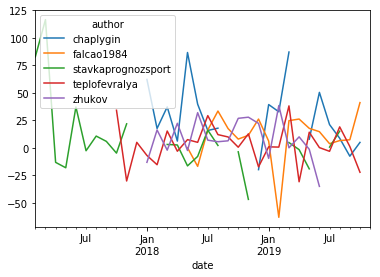

In [28]:
#plot success rate of some best authors
selected_authors = ['chaplygin'
                    #, 'arturio'
                    , 'falcao1984'
                    , 'zhukov'
                    , 'stavkaprognozsport'
                    , 'teplofevralya']
df_plot = df[df.author.isin(selected_authors)] \
    [['author', 'date', 'success_rate']]
df_plot = df_plot.pivot(index='date', columns='author', values='success_rate')
df_plot.plot()

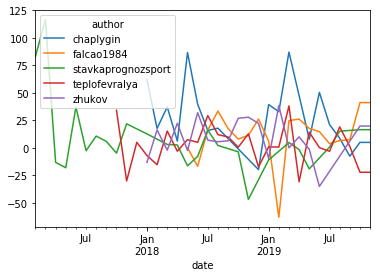

In [29]:
df_plot.interpolate().plot()